In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml22-assignment2/train_signal.csv
/kaggle/input/ml22-assignment2/sampleSubmission.csv
/kaggle/input/ml22-assignment2/train_feat.csv
/kaggle/input/ml22-assignment2/test_signal.csv
/kaggle/input/ml22-assignment2/test_feat.csv


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/ml22-assignment2/train_feat.csv")
test_try = pd.read_csv("/kaggle/input/ml22-assignment2/test_feat.csv")
test = pd.read_csv("/kaggle/input/ml22-assignment2/test_feat.csv") 

train1 = train.drop(["ID","Type","F158", "F170", "F171"], axis=1)
train2 =train['Type']
test = test.drop(["ID","F158", "F170", "F171"], axis=1)


In [4]:
test_id=test_try["ID"]
test_id=list(test_id)


In [5]:
train1df=pd.DataFrame(train1)
test=pd.DataFrame(test)

In [6]:
missing_values_train_count = train1df.isnull().sum()
for x in missing_values_train_count:
    if x!=0:
        print(x)
#print(missing_values_count)
missing_values_test_count = test.isnull().sum()
for x in missing_values_test_count:
    if x!=0:
        print("\n")
        print(x)

3
5


1


In [7]:
my_imputer = SimpleImputer(strategy="most_frequent")
train1 = my_imputer.fit_transform(train1)
test=my_imputer.fit_transform(test)

In [8]:
train1df=pd.DataFrame(train1)
test=pd.DataFrame(test)

In [9]:
missing_values_train_count = train1df.isnull().sum()
for x in missing_values_train_count:
    if x!=0:
        print(x)
#print(missing_values_count)
missing_values_test_count = test.isnull().sum()
for x in missing_values_test_count:
    if x!=0:
        print("\n")
        print(x)

In [10]:
trainData= train1
trainCls = train2.to_numpy()

In [11]:
X=trainData
Y=trainCls
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

The below GridSearchCV will run perfectly but it taking more time to execute.

In [12]:
#model = RandomForestClassifier()
#n_estimators = [10,50,100]
#max_features = ['sqrt', 'log2']
#bootstrap=[True,False]
#oob_score=[True,False]
#warm_start=[True,False]
#grid = dict(max_features=max_features,bootstrap=bootstrap,oob_score=oob_score,warm_start=warm_start)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
#grid_result = grid_search.fit(X, Y)
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [13]:
rfc=RandomForestClassifier(n_estimators=100,bootstrap=False,oob_score=False,max_features="sqrt",warm_start=False)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt')

In [14]:
sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False,
                                                 max_features='sqrt'))

In [15]:
scores = cross_validate(rfc, trainData, trainCls , cv=5)
print("Test Score")
print(scores['test_score'])
print("Mean & Standard Deviation")
print(np.mean(scores['test_score']), "+/-", np.std(scores['test_score']))

Test Score
[0.84270953 0.83314198 0.85068913 0.85298622 0.84954058]
Mean & Standard Deviation
0.8458134876331032 +/- 0.007201565770857327


In [16]:
sel.get_support()

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [17]:
ss=pd.DataFrame(X_train)
selected_feat= ss.columns[(sel.get_support())]
len(selected_feat)

56

In [18]:
preds = rfc.predict(X_test)

In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           A       0.90      0.78      0.84       360
           N       0.88      0.94      0.91      2346
           O       0.79      0.73      0.76      1123
           ~       0.65      0.41      0.50        90

    accuracy                           0.85      3919
   macro avg       0.80      0.72      0.75      3919
weighted avg       0.85      0.85      0.85      3919



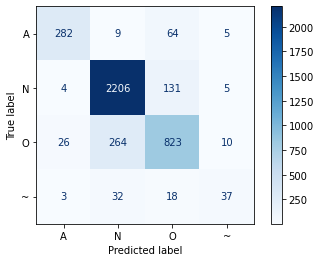

In [20]:
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

In [21]:
print(y_test)
print(preds)

['O' 'O' 'N' ... 'N' 'N' 'O']
['O' 'O' 'N' ... 'N' 'N' 'O']


In [22]:
print("Accuracy: ", accuracy_score(preds,y_test))

Accuracy:  0.8542995662158714


In [23]:
proba = rfc.predict(test.values)
print(proba)

['N' 'N' 'O' ... '~' 'N' 'N']


In [24]:
results = pd.DataFrame(list(zip(test_id, proba)),
               columns =['ID', 'Predicted'])

In [25]:
print(results.head())

       ID Predicted
0  C00000         N
1  C00001         N
2  C00002         O
3  C00003         O
4  C00004         O


In [26]:
results.to_csv("submission.csv",index=False)